<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [47]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import pearsonr


#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [3]:
boston_df.shape

(506, 14)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
# Drop first column
boston_df = boston_df.drop(columns= 'Unnamed: 0')

In [6]:
# Check missing values
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Descriptive Statistics and Visualizations

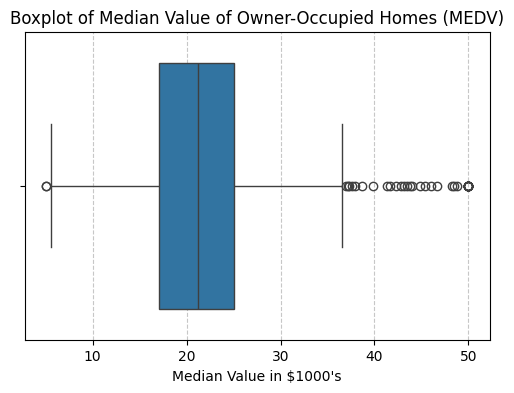

In [14]:
# Create a boxplot for the 'MEDV' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value in $1000\'s')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The mean is around 22, and there are many outliers.

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_9487/1905965734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=boston_df['CHAS'], palette=['darkblue', 'orange'])


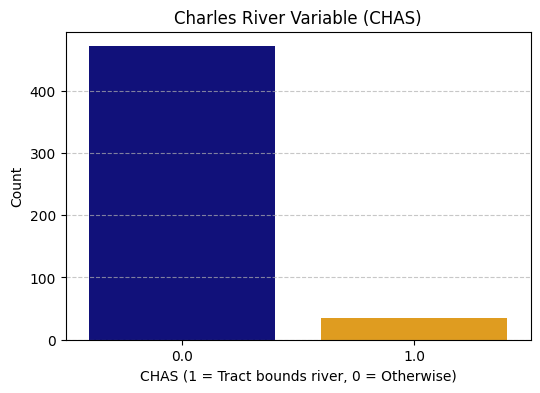

In [17]:
# Create a bar plot for the 'CHAS' variable
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'], palette=['darkblue', 'orange'])
plt.title('Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 = Tract bounds river, 0 = Otherwise)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of the houses are not near Charles river.

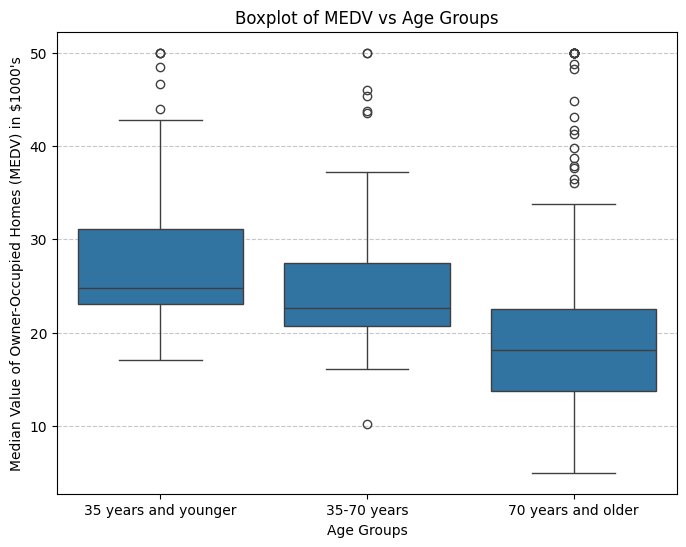

In [19]:
# Discretize the 'AGE' variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['35 years and younger', '35-70 years', '70 years and older'])

# Create a boxplot for the 'MEDV' variable against the discretized 'AGE' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV) in $1000\'s')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It shows that on average the median value of owner occupied homes is higher when the Age is lower.

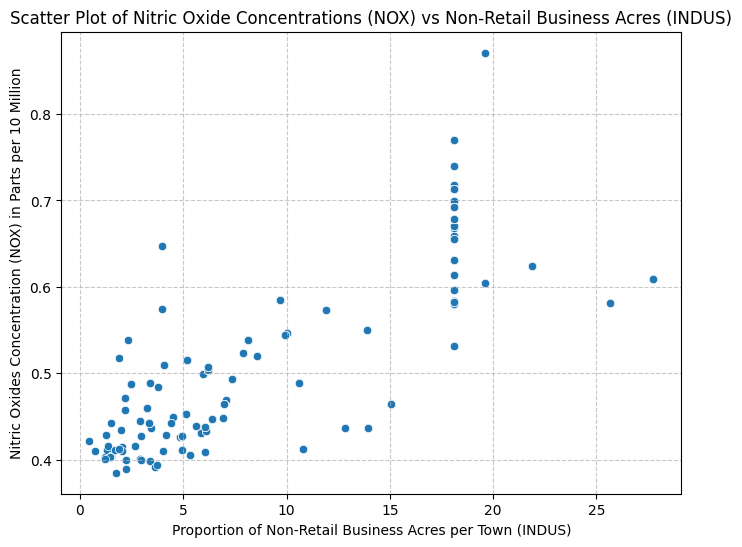

In [20]:
# Create a scatter plot for the relationship between 'NOX' and 'INDUS'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations (NOX) vs Non-Retail Business Acres (INDUS)')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX) in Parts per 10 Million')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Most of that data are located at the bottom left and it shows a positive correlation trend. The more industrial land or other non-retail business land is used in an area, the more serious the nitrogen oxide pollution will be.

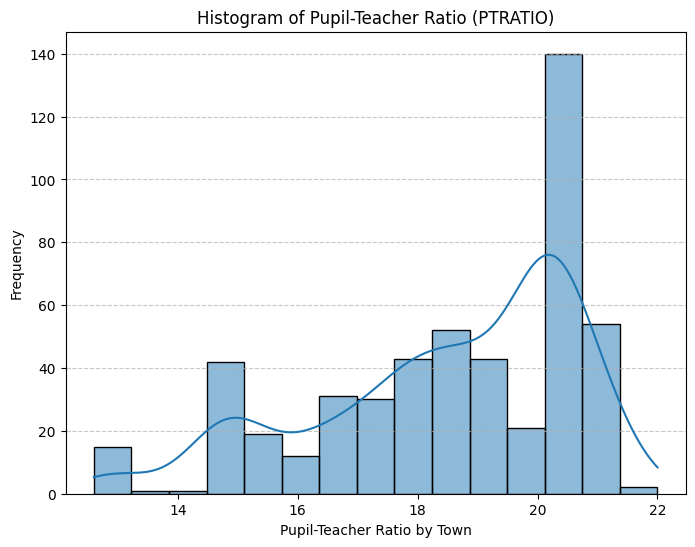

In [22]:
# Create a histogram for the 'PTRATIO' variable
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


_____

### Statistic Analysis

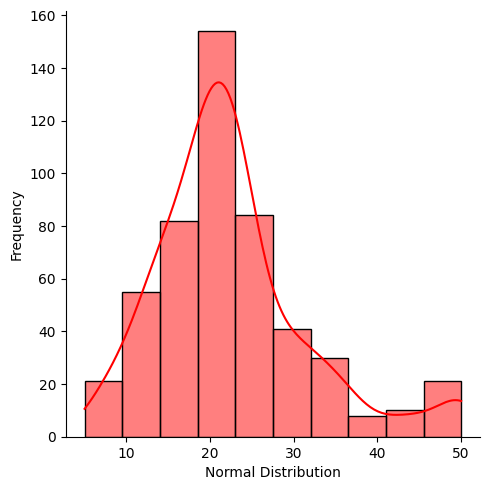

In [40]:
sns.displot(boston_df['MEDV'], bins=10, kde=True, color='red')
plt.xlabel('Normal Distribution')
plt.ylabel('Frequency')
plt.show()

## we can assume that MEDV it is normal

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis (H0): There is no significant difference in the median value of houses whether they are bounded by the Charles River or not.

Alternative Hypothesis (H1): There is a significant difference in the median value of houses between those that are bounded by the Charles River and those that are not.

In [43]:
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

scipy.stats.levene(medv_river, medv_no_river, 
                   center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398632)

Since the p-value for the Levene test is less than 0.05, the hypothesis that the variances are equal is rejected.

In [45]:
scipy.stats.ttest_ind(medv_river, medv_no_river, 
                      equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

Since the p-value is less than 0.05, we can conclude that there is a statistically significant difference in the median value of houses that are bounded by the Charles River (CHAS = 1) compared to those that are not (CHAS = 0).

##### Q: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [31]:
# Group the 'MEDV' values by 'AGE_group'
medv_age_group1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
medv_age_group2 = boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV']
medv_age_group3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

# ANOVA
anova_result = f_oneway(medv_age_group1, medv_age_group2, medv_age_group3)
anova_result

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since the p-value is much smaller than 0.05, we can conclude that there is a statistically significant difference in the median values of houses (MEDV) among the different groups of the proportion of owner-occupied units built prior to 1940 (AGE).

##### Q: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [35]:
# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])

corr_coeff, p_value_corr

(0.763651446920915, 7.913361061241171e-98)

The correlation coefficient (0.76) indicates a strong positive relationship between NOX and INDUS, suggesting that as the proportion of non-retail business acres increases, the concentration of Nitric oxide also tends to increase.

The p-value is < 0.05. Therefore, we cannot conclude that there is no relationship; instead, there is a significant positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [51]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        17:04:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for the DIS variable is 4.7985 with p-value < 0.05.
 
This means the relationship is statistically significant and each additional unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes (MEDV) increases by approximately $4,798.5.